In [123]:
%run ./Assignment2-stereo-utils.ipynb
%matplotlib inline

In [124]:
stereo_capture1_1 = read_image('./../images/stereoCorrespondence/1_1.jpg')
stereo_capture1_2 = read_image('./../images/stereoCorrespondence/1_2.jpg')

stereo_capture2_1 = resize(read_image('./../images/stereoCorrespondence/2_1.png'), scale = 85)
stereo_capture2_2 = resize(read_image('./../images/stereoCorrespondence/2_2.png'), scale = 85)
stereo_capture2_1 = np.pad(stereo_capture2_1, ((0,1),(0,0),(0,0)), 'constant', constant_values = 0)

stereo_capture3_1 = resize(read_image('./../images/stereoCorrespondence/3_1.jpg'))
stereo_capture3_2 = resize(read_image('./../images/stereoCorrespondence/3_2.jpg'))

### Intensity-window based correlation

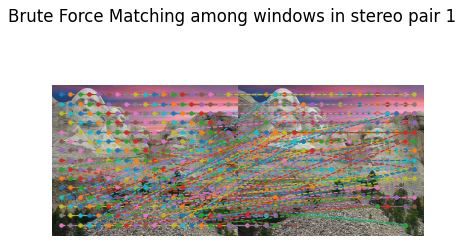

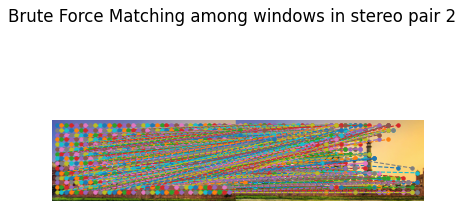

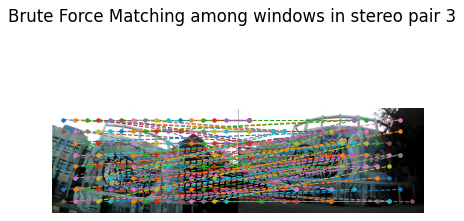

In [157]:
plot_best_match(stereo_capture1_1, stereo_capture1_2, 1)
plot_best_match(stereo_capture2_1, stereo_capture2_2, 2)
plot_best_match(stereo_capture3_1, stereo_capture3_2, 3)

### Plotting epipolar lines

The number of matches: 25
 The number of corresponding descriptors:  25
25


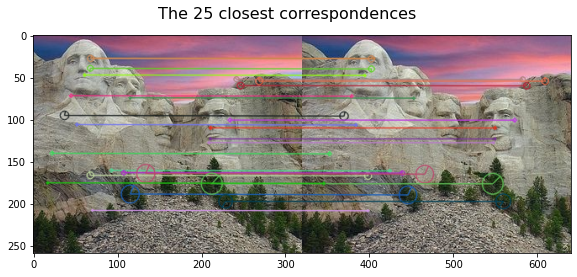

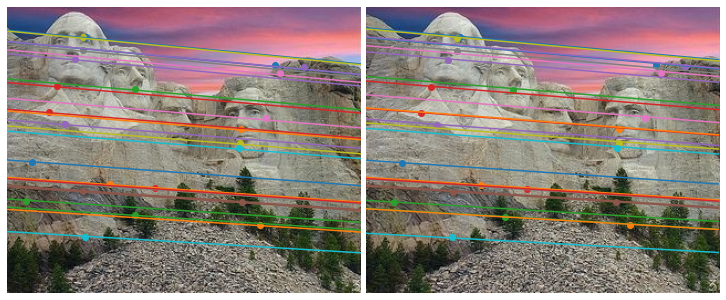

The number of matches: 67
 The number of corresponding descriptors:  67
67


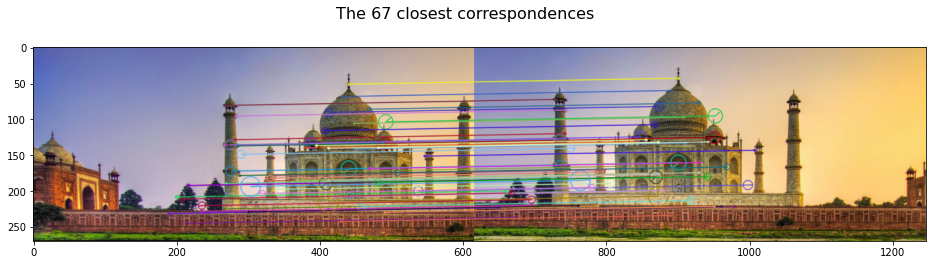

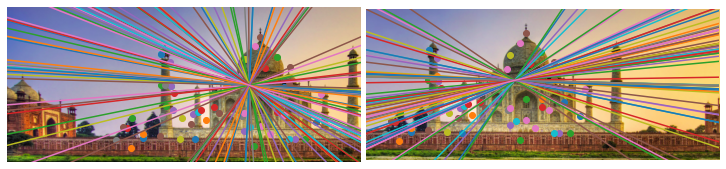

The number of matches: 18
 The number of corresponding descriptors:  18
18


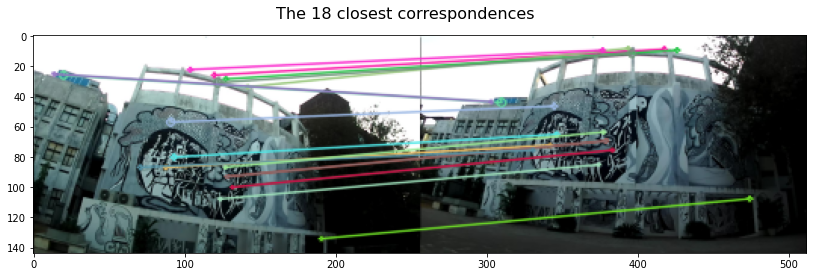

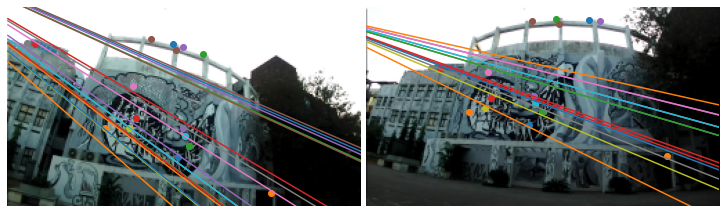

In [161]:
epilines(stereo_capture1_1, stereo_capture1_2)
epilines(stereo_capture2_1, stereo_capture2_2)
epilines(stereo_capture3_1, stereo_capture3_2)

### Stereo Rectification

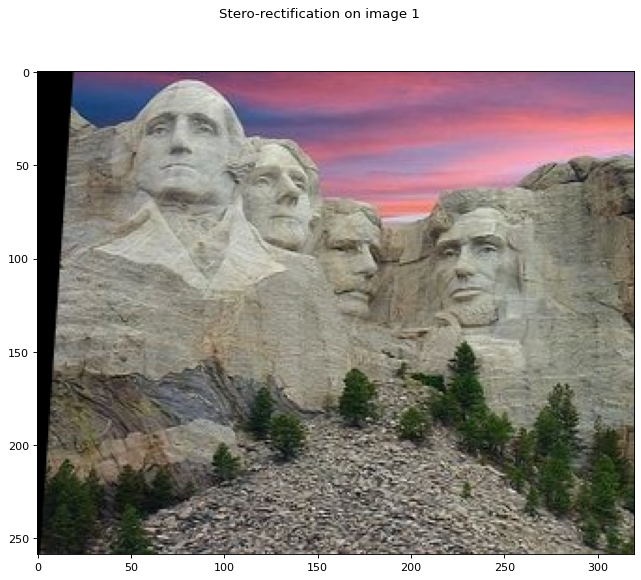

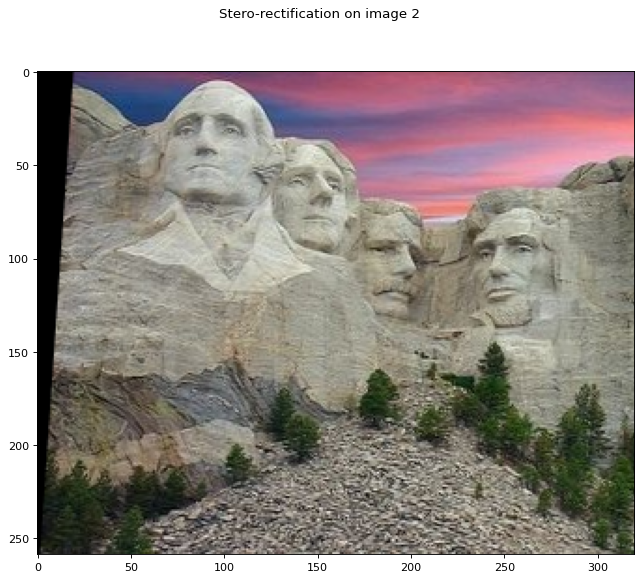

In [127]:
'''
Takes the epipoles to infinity -> matches lie on the epipolar line which is now the corresponding row in the other image
'''
# print(stereo_capture1_1.shape[0:2][::-1])
stereo_rectified1_1, stereo_rectified1_2 = stereo_rectification(stereo_capture1_1, stereo_capture1_2, display = True)

### Greedy matching on an unrectified stereo image pair

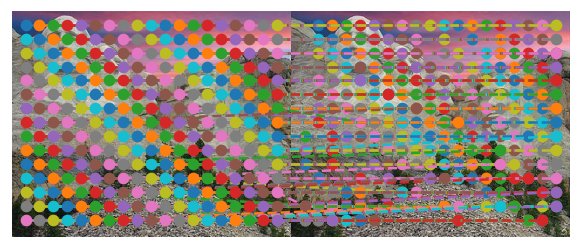

In [140]:
greedy_match_visualized(stereo_capture1_1, stereo_capture1_2)
# greedy_match_visualized(stereo_capture2_1, stereo_capture2_2)
# greedy_match_visualized(stereo_capture3_1, stereo_capture3_2)

### Greedy matching on a rectified stereo image pair

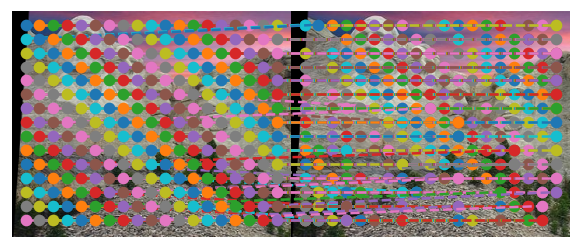

In [141]:
greedy_match_visualized(stereo_rectified1_1, stereo_rectified1_2)


### Dense SIFT matching

The number of matches: 113
 The number of corresponding descriptors:  113


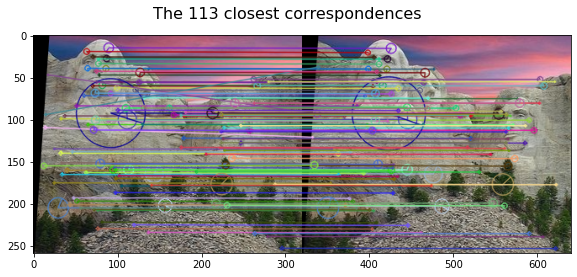

In [207]:
_,_,_ = get_points_descriptors(stereo_rectified1_1, stereo_rectified1_2, dense = True, display = True)


## Brute force vs Greedy based approach

#### Method overview:

The brute force based block matching technique attempts to find the "most similar" block among all blocks in the counter stereo image. This is very inefficient as the search space (for each block in the first image) is the entire second image. Also, this could lead to erroneous matches (especially in textureless regions) as there are more possible blocks to consider.

The time complexity for this is the number of patches in the first image * number of patches in the second image



The Greedy based approach uses the co-planarity constraint that any three points will lie on the same plane. Futhermore, we already know that two of the three points are the epipoles, the third point will lie in the 3D space given by the rotation of points about the epipolar axis. What this means is that the search space for a corresponding patch reduces from a 2D search space to a 1D search space. More specifically, the epipolar line. Now, every epipolar line passes through an epipole. What rectifying a stereo image pair does is that it takes the epopoles of each image to infinity. What this means for the epipolar lines is that they now lie along a certain row in an image. More specifically, the epipolar line corresponding to a patch (m,n) lies in the m'th row of the second image. So, in addition to reducing the search space to 1 dimension, we also know where to look for the corresponding patch in the second image. 


The co-planarity constraint: $x_{1}^{'} F_{12} x_{2} = 0$ 
Where $F$ is the fundamental matrix, obtained using the 8 point algorithm, relating the two image planes. 


The time complexity for this is the number of patches in the first image * number of patches along a row in the second image.

Thus, the greedy block matching technique is superior in terms of efficiency when compared to the brute force technique.

#### Observations:

In highly textured images, the brute force matcher gives results comparable to the greedy matcher (in terms of the number of blocks matched correctly). However, in rather textureless images, the greedy based matcher is able to match blocks with a higher accuracy than the brute force matcher.